# <font color="#FF0000"> Project Name : Adult (Census) Dataset Analysis </font> 

#### <font color="#80080"> Aim : </font> 
##### Predict whether income exceeds $50k/yr based on census data.Also known as " Census Income " Dataset.

#### <font color="#80080"> Dataset Overview :</font> 
##### Adult or Census Income dataset from UCI Machine Learning Repository can be download from https://archive.ics.uci.edu/dataset/2/adult

#### <font color="#80080"> Introduction to the Project : </font> 
##### The Adult Dataset, extracted from the 1994 US Census, provides a unique opportunity to explore the relationships between demographic and socioeconomic factors and individual income levels. With over 48,000 instances and 15 attributes, this dataset offers a comprehensive snapshot of the adult population in the United States. The primary objective of this project is to develop a predictive model that accurately classifies individuals into two income categories: above or below $50,000 per year.

#### <font color="#80080"> The Goal of the Project :</font> 
##### The Goal is to predict whether a person has an income of more than 50K a year or not.This is basically a binary classification problem where a person is classified into the more than 50K group or less than or equal to 50K group.

## <font color="#4863A0"> Import Necessary Libraries</font>
This comment indicates that we are importing the necessary libraries for our machine learning code. These libraries include **pandas**, **numpy**, **matplotlib**, **seaborn**, and **scikit-learn**, which are commonly used for *data manipulation*, *analysis*, *visualization*, and *machine learning algorithms*.

In [1]:
# Standard library imports
import warnings # For warning handling


import pandas as pd # for data manipulation and analysis, CSV file I/O
import numpy as np # For numerical operations and mathematical functions
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For statistical graphics
from sklearn.model_selection import train_test_split # For data splitting (Training & Testing) in machine learning
from sklearn.preprocessing import MinMaxScaler, StandardScaler # For feature standardization & Normalization
from sklearn.metrics import accuracy_score, classification_report # For model evaluation
from termcolor import colored # For colored text printing
import plotly.express as px #  for creating interactive, web-based visualizations. 

# For warning handling
warnings.filterwarnings('ignore') # For ignoring warnings

## <font color="#4863A0"> Data Preprocessing Steps
 </font>

In [2]:
# Read the CSV file 
data = pd.read_csv("C:/Users/midhu/Downloads/adult.csv")
data

age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing      Husband  White    Male   
2      Married-civ-spouse    Protective-serv      Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4           Never-married                  ?    Own-child  White  Female   
...                   ...                ...          ...    ...     ...   
48837  Married-civ-spouse       Tech-support         Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
48839             Widowed       Adm-clerical    Unmarried  White  Female   
48840       Never-married       Adm-clerical    Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial         Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0                 0             0              40  United-States  <=50K  
1                 0             0              50  United-States  <=50K  
2                 0             0              40  United-States   >50K  
3              7688             0              40  United-States   >50K  
4                 0             0              30  United-States  <=50K  
...             ...           ...             ...            ...    ...  
48837             0             0              38  United-States  <=50K  
48838             0             0              40  United-States   >50K  
48839             0             0              40  United-States  <=50K  
48840             0             0              20  United-States  <=50K  
48841         15024             0              40  United-States   >50K  

[48842 rows x 15 columns]

### <font color="800080"> Dataset Information </font>

Welcome to the Loan Prediction Dataset. This dataset provides insights into loan applications, inclusive **48842** records and **15** attributes.

**Aim** :
Predict whether income exceeds $50k/yr based on census data. Also known as " Census Income " Dataset.

**Introduction to the Project** :
The Adult Dataset, extracted from the 1994 US Census, provides a unique opportunity to explore the relationships between demographic and socioeconomic factors and individual income levels. With over 48,000 instances and 15 attributes, this dataset offers a comprehensive snapshot of the adult population in the United States. The primary objective of this project is to develop a predictive model that accurately classifies individuals into two income categories: above or below $50,000 per year.

In [3]:
# Displaying the first 7 rows.
data_rows = data.head(7)  # .head() the default value = 5

print(colored('As you can see, the first 7 rows in the dataset:\n', 'green', attrs=['reverse']))

# Iterate over each row in the loan_data_rows DataFrame
for index, row in data_rows.iterrows():
    # Print the index label of the current row, "index + 1" start with 1 not 0 
    print(colored(f"Row {index + 1}:", "white", attrs=['reverse']))
    
    # Print the content of the current row
    print(row)
    
    # Print a separator line
    print("--------------------------------------")


# .iterrows() function:
# Returns: (index, data|row|series)
#     Index: the index of the row.
#     Data: the data of the row as a series.
# Note: The column names will also be returned, in addition to the specified rows.

As you can see, the first 7 rows in the dataset:

Row 1:
age                               25
workclass                    Private
fnlwgt                        226802
education                       11th
educational-num                    7
marital-status         Never-married
occupation         Machine-op-inspct
relationship               Own-child
race                           Black
gender                          Male
capital-gain                       0
capital-loss                       0
hours-per-week                    40
native-country         United-States
income                         <=50K
Name: 0, dtype: object
--------------------------------------
Row 2:
age                                38
workclass                     Private
fnlwgt                          89814
education                     HS-grad
educational-num                     9
marital-status     Married-civ-spouse
occupation            Farming-fishing
relationship                  Husband
race           

In [4]:
data.head(10) #  Read the first 10 entries

age         workclass  fnlwgt     education  educational-num  \
0   25           Private  226802          11th                7   
1   38           Private   89814       HS-grad                9   
2   28         Local-gov  336951    Assoc-acdm               12   
3   44           Private  160323  Some-college               10   
4   18                 ?  103497  Some-college               10   
5   34           Private  198693          10th                6   
6   29                 ?  227026       HS-grad                9   
7   63  Self-emp-not-inc  104626   Prof-school               15   
8   24           Private  369667  Some-college               10   
9   55           Private  104996       7th-8th                4   

       marital-status         occupation   relationship   race  gender  \
0       Never-married  Machine-op-inspct      Own-child  Black    Male   
1  Married-civ-spouse    Farming-fishing        Husband  White    Male   
2  Married-civ-spouse    Protective-serv        Husband  White    Male   
3  Married-civ-spouse  Machine-op-inspct        Husband  Black    Male   
4       Never-married                  ?      Own-child  White  Female   
5       Never-married      Other-service  Not-in-family  White    Male   
6       Never-married                  ?      Unmarried  Black    Male   
7  Married-civ-spouse     Prof-specialty        Husband  White    Male   
8       Never-married      Other-service      Unmarried  White  Female   
9  Married-civ-spouse       Craft-repair        Husband  White    Male   

   capital-gain  capital-loss  hours-per-week native-country income  
0             0             0              40  United-States  <=50K  
1             0             0              50  United-States  <=50K  
2             0             0              40  United-States   >50K  
3          7688             0              40  United-States   >50K  
4             0             0              30  United-States  <=50K  
5             0             0              30  United-States  <=50K  
6             0             0              40  United-States  <=50K  
7          3103             0              32  United-States   >50K  
8             0             0              40  United-States  <=50K  
9             0             0              10  United-States  <=50K

In [5]:
# Show the shape of the dataset
print("The shape =", data.shape)

The shape = (48842, 15)


In [6]:
# Dataset dimensions and statistics
num_rows, num_cols = data.shape
num_features = num_cols - 1
num_data = num_rows * num_cols

# Print the information about the dataset
print(f"Number of Rows : {num_rows}")
print(f"Number of Columns : {num_cols}")
print(f"Number of Features : {num_features}")
print(f"Number of All Data : {num_data}")

# Check and ensure running
print(colored("The task has been completed without any errors....", "green" , attrs=['reverse']))

Number of Rows : 48842
Number of Columns : 15
Number of Features : 14
Number of All Data : 732630
The task has been completed without any errors....


In [7]:
# Get basic information from dataset like "Column names", "Data types" and "Non-null values counts"
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [8]:
# To see the datatypes
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

- int64: Represents integer data type.

- float64: Represents floating-point data type.

- object: Represents string data type (typically used for categorical data

In [9]:
# Identify missing values in the data set in columns
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

- Output confirms that there are no missing values in any of the columns of your dataset.

In [10]:
 # Its gives the unique values of all the features
data.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

- High Cardinality : Columns like age, fnlwgt, capital-gain, and hours-per-week have a high number of unique values, indicating a wide range of data points.

- Categorical Diversity : Columns like workclass, education, marital-status, occupation, and native-country have a moderate number of unique values, reflecting various categories within each feature.

- Binary Categories: Features like gender and income have only 2 unique values, indicating binary classifications.

In [11]:
# Descriptive Statistics of Numeric Variables only.
data.describe().T

count           mean            std      min       25%  \
age              48842.0      38.643585      13.710510     17.0      28.0   
fnlwgt           48842.0  189664.134597  105604.025423  12285.0  117550.5   
educational-num  48842.0      10.078089       2.570973      1.0       9.0   
capital-gain     48842.0    1079.067626    7452.019058      0.0       0.0   
capital-loss     48842.0      87.502314     403.004552      0.0       0.0   
hours-per-week   48842.0      40.422382      12.391444      1.0      40.0   

                      50%       75%        max  
age                  37.0      48.0       90.0  
fnlwgt           178144.5  237642.0  1490400.0  
educational-num      10.0      12.0       16.0  
capital-gain          0.0       0.0    99999.0  
capital-loss          0.0       0.0     4356.0  
hours-per-week       40.0      45.0       99.0

- **count =** The number of non-null values.
- **mean =** Avarage.
- **Standard Deviation (std) =** A measure of the spread of the variable's values around the mean. A higher standard deviation indicates greater variability in the data.
- **min =** The smallest value. 
- **25% =** It represents the value below which 25% of the data fall
- **50% =** It represents the value below which 50% of the data fall
- **75% =** It represents the value below which 75% of the data fall
- **max =** The largest value.

### <font color="#800080" size=""> Understanding Categorical data 🔍</font>

In [12]:
# To view all the column names in the dataset
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

### Column Names:
- **age :**  Age of the individual.
- **workclass :** Type of employer.
- **fnlwgt :** Final weight, a sampling weight used in the dataset.
- **education :** Highest level of education.
- **educational-num :** Number of years of schooling.
- **marital-status :** Marital status.
- **occupation :** Type of occupation.
- **relationship :** Relationship to the head of household.
- **race :** Racial background.
- **gender :** Gender of the individual.
- **capital-gain :** Capital gain income.
- **capital-loss :** Capital loss income.
- **hours-per-week :** Hours worked per week.
- **native-country :** Country of origin.
- **income :** Target variable (income level, either <=50K or >50K).

In [13]:
# counting the frequency of each unique value in the workclass column
data['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

**Output means :**

- **Private :** 33,906 entries belong to the private sector.

- **Self-emp-not-inc :** 3,862 entries are self-employed but not incorporated.

- **Local-gov :** 3,136 entries are employed by local government.

- **? :** 2,799 entries have missing or unknown work class information.

- **State-gov :** 1,981 entries are employed by state government.

- **Self-emp-inc :** 1,695 entries are self-employed and incorporated.

- **Federal-gov :** 1,432 entries are employed by the federal government.

- **Without-pay :** 21 entries work without pay.

- **Never-worked :** 10 entries have never worked.

This output provides a quick overview of the distribution of work classes in this dataset, helping you understand how many individuals fall into each category.

In [14]:
data['fnlwgt'].value_counts()

fnlwgt
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
188488     1
285290     1
293579     1
114874     1
257302     1
Name: count, Length: 28523, dtype: int64

In [15]:
# counting the number of occurrences of each unique value in the education column of  dataset
data['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

**Output means :**

- **HS-grad :** 15,784 individuals are high school graduates.

- **Some-college :** 10,878 individuals have attended some college but did not earn a degree.

- **Bachelors :** 8,025 individuals hold a bachelor's degree.

- **Masters :** 2,657 individuals have a master's degree.

- **Assoc-voc :** 2,061 individuals have an associate degree from a vocational program.

- **11th :** 1,812 individuals completed the 11th grade.

- **Assoc-acdm :** 1,601 individuals have an associate degree from an academic program.

- **10th :** 1,389 individuals completed the 10th grade.

- **7th-8th :** 955 individuals have education up to the 7th or 8th grade.

- **Prof-school :** 834 individuals attended professional school.

- **9th :** 756 individuals completed the 9th grade.

- **12th :** 657 individuals completed the 12th grade.

- **Doctorate :** 594 individuals hold a doctoral degree.

- **5th-6th :** 509 individuals have education up to the 5th or 6th grade.

- **1st-4th :** 247 individuals have education up to the 1st to 4th grade.

- **Preschool :** 83 individuals have education up to preschool level.

In [16]:
data['educational-num'].value_counts()

educational-num
9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: count, dtype: int64

In [17]:
data['age'].value_counts()

age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64

In [18]:
#counting the number of occurrences of each unique value in the marital-status column of  dataset.
data[ 'marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

**Output means :**

- **Married-civ-spouse :** 22,379 individuals are married and living with their spouse.

- **Never-married :** 16,117 individuals have never been married.

- **Divorced :** 6,633 individuals are divorced.

- **Separated :** 1,530 individuals are currently separated from their spouse.

- **Widowed :** 1,518 individuals have lost their spouse.

- **Married-spouse-absent :** 628 individuals are married but their spouse is absent.

- **Married-AF-spouse :** 37 individuals are married to someone in the Armed Forces.

In [19]:
data['relationship' ].value_counts()

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

In [20]:
data['race' ].value_counts()

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

In [21]:
data['gender' ].value_counts()

gender
Male      32650
Female    16192
Name: count, dtype: int64

In [22]:
data['capital-gain' ].value_counts()

capital-gain
0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
1111         1
7262         1
22040        1
1639         1
2387         1
Name: count, Length: 123, dtype: int64

In [23]:
data['capital-loss' ].value_counts()

capital-loss
0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
2465        1
2080        1
155         1
1911        1
2201        1
Name: count, Length: 99, dtype: int64

In [24]:
data['hours-per-week' ].value_counts()

hours-per-week
40    22803
50     4246
45     2717
60     2177
35     1937
      ...  
69        1
87        1
94        1
82        1
79        1
Name: count, Length: 96, dtype: int64

In [25]:
data['native-country' ].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

**Output means :**

- **United-States :** 43,832 individuals are from the United States.

- **Mexico :** 951 individuals are from Mexico.

- **? :** 857 entries have missing or unknown country information.

- **Philippines :** 295 individuals are from the Philippines.

- **Germany :** 206 individuals are from Germany.

- **Puerto-Rico :** 184 individuals are from Puerto Rico.

- **Canada :** 182 individuals are from Canada.

- **El-Salvador :** 155 individuals are from El Salvador.

- **India :** 151 individuals are from India.

The list continues with other countries, showing the number of individuals from each.

In [26]:
data['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

**Output means :**

- **Prof-specialty :** 6,172 entries are in professional specialty occupations.

- **Craft-repair :** 6,112 entries are in craft and repair occupations.

- **Exec-managerial :** 6,086 entries are in executive and managerial occupations.

- **Adm-clerical :** 5,611 entries are in administrative and clerical occupations.

- **Sales :** 5,504 entries are in sales occupations.

- **Other-service :** 4,923 entries are in other service occupations.

- **Machine-op-inspct :** 3,022 entries are in machine operation and inspection occupations.

- **? :** 2,809 entries have missing or unknown occupation information.

- **Transport-moving :** 2,355 entries are in transportation and moving occupations.

- ** Handlers-cleaners :** 2,072 entries are in handling and cleaning occupations.

- **Farming-fishing :** 1,490 entries are in farming and fishing occupations.

- **Tech-support :** 1,446 entries are in technical support occupations.

- **Protective-serv :** 983 entries are in protective service occupations.

- **Priv-house-serv :** 242 entries are in private household service occupations.

- **Armed-Forces :** 15 entries are in the armed forces.

In [27]:
# counts the occurrences of each unique value in the income column of your dataset, showing how many individuals earn less than or equal to $50,000 per yearand how many earn more than $50,000 per year.
data['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

**Output means :**

- **<=50K :** 37,155 individuals earn less than or equal to $50,000 annually.

- **>50K :** 11,687 individuals earn more than $50,000 annually.

**Missing Values**

- **workclass :** 2,799 records

- **occupation :** 2,809 records

- **native-country :** 857 records



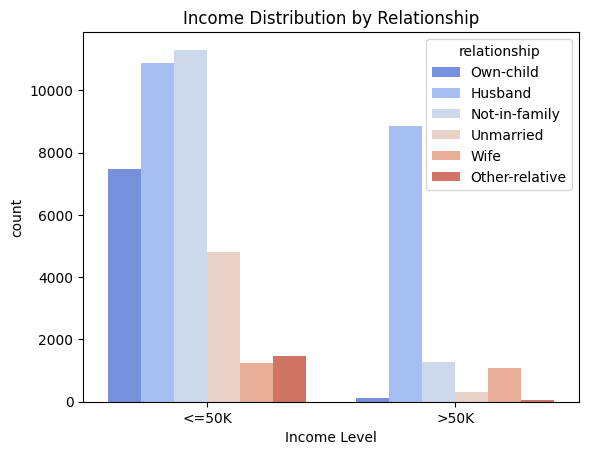

In [28]:
# creates a bar plot to visualize the distribution of income levels by relationship status using the seaborn library.
sns.countplot(x='income',palette='coolwarm', hue='relationship' , data=data)
plt.title('Income Distribution by Relationship')
plt.xlabel('Income Level')
plt.show()

The resulting bar plot visually represents how different relationship statuses are distributed across the income levels in your dataset. The color-coding helps in distinguishing the various relationship categories, making it easier to identify patterns and insights.

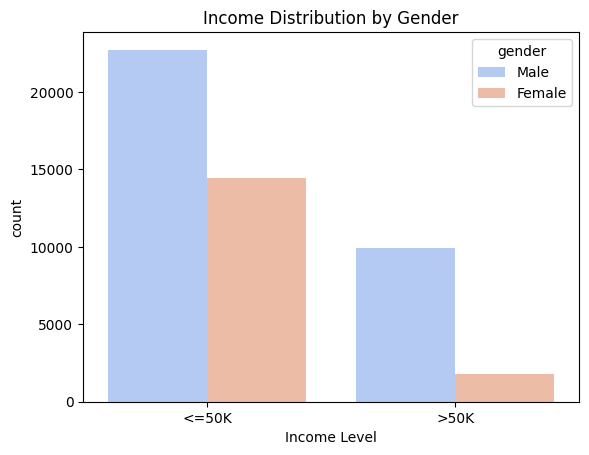

In [29]:
#bar plot that shows the distribution of income levels by gender
sns.countplot(x='income',palette='coolwarm', hue='gender' , data=data)
plt.title('Income Distribution by Gender')
plt.xlabel('Income Level')
plt.show()

**Means :**

- **X-Axis (Income Level) :** The income levels are divided into two categories: <=50K and >50K.

- **Y-Axis (Count) :** The y-axis represents the count of individuals in each income category.

- **Hue (Gender) :** The bars are color-coded by gender, with blue representing males and peach representing females.

*Insights from the Plot*

- **Income Distribution :** There are significantly more individuals earning <=50K compared to those earning >50K for both genders.

*Gender Comparison :*

In both income categories, there are more males than females.

This disparity is more pronounced in the >50K category, where the number of males is higher compared to females.

*Title and Labels*

- **Title :** "Income Distribution by Gender"—this gives a clear idea of what the plot represents.

- **X-Axis Label :** "Income Level"—this clarifies what the x-axis categories signify.

This visualization helps you quickly understand the relationship between income levels and gender distribution in this dataset.

## <font color="#800080">  Filling in missing values ( ? )

In [30]:
# Replace the values with mode
data['workclass'] = data['workclass'].replace('?' , 'Private')
data['occupation'] = data['occupation'].replace('?' , 'Prof-speciality')
data['native-country'] = data['native-country'].replace('?' , 'United-States')

**Replace Missing Workclass Values :**

df['workclass'] = df['workclass'].replace('?', 'Private')

This line replaces all instances of '?' in the workclass column with 'Private'

**Replace Missing Occupation Values :**

df['occupation'] = df['occupation'].replace('?', 'Prof-specialty')

This line replaces all instances of '?' in the occupation column with 'Prof-specialty'

**Replace Missing Native Country Values :**

df['native-country'] = df['native-country'].replace('?', 'United-States')

This line replaces all instances of '?' in the native-country column with 'United-States'


In [31]:
data.head(8)

age         workclass  fnlwgt     education  educational-num  \
0   25           Private  226802          11th                7   
1   38           Private   89814       HS-grad                9   
2   28         Local-gov  336951    Assoc-acdm               12   
3   44           Private  160323  Some-college               10   
4   18           Private  103497  Some-college               10   
5   34           Private  198693          10th                6   
6   29           Private  227026       HS-grad                9   
7   63  Self-emp-not-inc  104626   Prof-school               15   

       marital-status         occupation   relationship   race  gender  \
0       Never-married  Machine-op-inspct      Own-child  Black    Male   
1  Married-civ-spouse    Farming-fishing        Husband  White    Male   
2  Married-civ-spouse    Protective-serv        Husband  White    Male   
3  Married-civ-spouse  Machine-op-inspct        Husband  Black    Male   
4       Never-married    Prof-speciality      Own-child  White  Female   
5       Never-married      Other-service  Not-in-family  White    Male   
6       Never-married    Prof-speciality      Unmarried  Black    Male   
7  Married-civ-spouse     Prof-specialty        Husband  White    Male   

   capital-gain  capital-loss  hours-per-week native-country income  
0             0             0              40  United-States  <=50K  
1             0             0              50  United-States  <=50K  
2             0             0              40  United-States   >50K  
3          7688             0              40  United-States   >50K  
4             0             0              30  United-States  <=50K  
5             0             0              30  United-States  <=50K  
6             0             0              40  United-States  <=50K  
7          3103             0              32  United-States   >50K

## <font color="800080"> Feature Engineering Or Replacement</font>

In [32]:
# education Category
data.education=data.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'School')
data.education=data.education.replace('HS-grad', 'Highschool')
data.education=data.education.replace(['Assoc-voc','Assoc-acdm', 'Prof-school', 'Some-college'], 'Higher')
data.education=data.education.replace('Bachelors', 'Undergrad')
data.education=data.education.replace('Masters', 'Grad')
data.education=data.education.replace('Doctorate', 'Doc')

**Grouping Lower Education Levels :**

df.education = df.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th'], 'School')

This line replaces various primary and secondary education levels with the broader category 'School'.

**Replacing High School Graduates :**

df.education = df.education.replace('HS-grad', 'High school')

This line changes HS-grad (high school graduates) to 'High school'.

**Consolidating Higher Education (Associate, Professional School, and Some College) :**

df.education = df.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'Higher')

This line groups Associate degrees (vocational and academic), Professional school, and Some college into the category 'Higher'.

**Replacing Bachelors :**

df.education = df.education.replace('Bachelors', 'Undergrad')

This line changes Bachelors to 'Undergrad'.

**Replacing Masters :**

df.education = df.education.replace('Masters', 'Grad')

This line changes Masters to 'Grad'.

**Replacing Doctorate :**

df.education = df.education.replace('Doctorate', 'Doc')

This line changes Doctorate to 'Doc'.

In [33]:
#martial status
data['marital-status']= data['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'Married')
data['marital-status']= data['marital-status'].replace(['Never-married'], 'Not-Married')
data['marital-status']= data['marital-status'].replace(['Divorced', 'Seperated', 'Widowd', 'Married-spouse-absent'], 'Other')

**Grouping Married Statuses :**

df['marital-status'] = df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'Married')

This line replaces Married-civ-spouse and Married-AF-spouse with Married.

**Renaming Never Married Status :**

df['marital-status'] = df['marital-status'].replace(['Never-married'], 'Not-Married')

This line changes Never-married to Not-Married.

**Grouping Other Statuses :**

df['marital-status'] = df['marital-status'].replace(['Divorced', 'Separated', 'Widowed', 'Married-spouse-absent'], 'Other')

This line replaces Divorced, Separated, Widowed, and Married-spouse-absent with Other.

In [34]:
# Income
data.income = data.income.replace('<=50k', 0)
data.income = data.income.replace('>50k', 1)

**Replace <=50K with 0 :**

df.income = df.income.replace('<=50K', 0)

This line changes all instances of <=50K to 0. This means that individuals earning less than or equal to $50,000 are now represented by 0.

**Replace >50K with 1 :**

df.income = df.income.replace('>50K', 1)

This line changes all instances of >50K to 1. This means that individuals earning more than $50,000 are now represented by 1.

In [35]:
data.head()

age  workclass  fnlwgt   education  educational-num marital-status  \
0   25    Private  226802      School                7    Not-Married   
1   38    Private   89814  Highschool                9        Married   
2   28  Local-gov  336951      Higher               12        Married   
3   44    Private  160323      Higher               10        Married   
4   18    Private  103497      Higher               10    Not-Married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4    Prof-speciality    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [36]:
data['marital-status'].value_counts()

marital-status
Married        22416
Not-Married    16117
Other           7261
Separated       1530
Widowed         1518
Name: count, dtype: int64

**Outpute= means :**

- **married :** 22,416 individuals are classified as married.

- **not-married :** 16,117 individuals are classified as not married.

- **other :** 8,791 individuals are classified under other statuses (which include Divorced, Separated, Widowd, and Married-spouse-absent).

- **Widowed :** 1,518 individuals are widowed.

In [37]:
data['education'].value_counts()

education
Highschool    15784
Higher        15374
Undergrad      8025
School         6408
Grad           2657
Doc             594
Name: count, dtype: int64

## <font color="#4863A0"> Data Visualization

Creating visual representations such as **histograms**,**scatter plots**, **box plots**, and **heatmaps** to explore the distribution, relationships, and trends within the dataset. Visualization aids in identifying **patterns**, **correlations**, and **potential insights** that may not be apparent from just looking at the raw data. there are some ways to discover it:
- Graphical Analysis
    - Bar Charts
    - Pie Charts 
    - Histograms
- Correlation Analysis
- Data Relationships Analysis

## <font color="#800080">  Correlation Matrix

In [38]:
correlation_matrix = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix.corr()

age    fnlwgt  educational-num  capital-gain  \
age              1.000000 -0.076628         0.030940      0.077229   
fnlwgt          -0.076628  1.000000        -0.038761     -0.003706   
educational-num  0.030940 -0.038761         1.000000      0.125146   
capital-gain     0.077229 -0.003706         0.125146      1.000000   
capital-loss     0.056944 -0.004366         0.080972     -0.031441   
hours-per-week   0.071558 -0.013519         0.143689      0.082157   

                 capital-loss  hours-per-week  
age                  0.056944        0.071558  
fnlwgt              -0.004366       -0.013519  
educational-num      0.080972        0.143689  
capital-gain        -0.031441        0.082157  
capital-loss         1.000000        0.054467  
hours-per-week       0.054467        1.000000

The correlation matrix shows the relationships between different numeric variables in the dataset

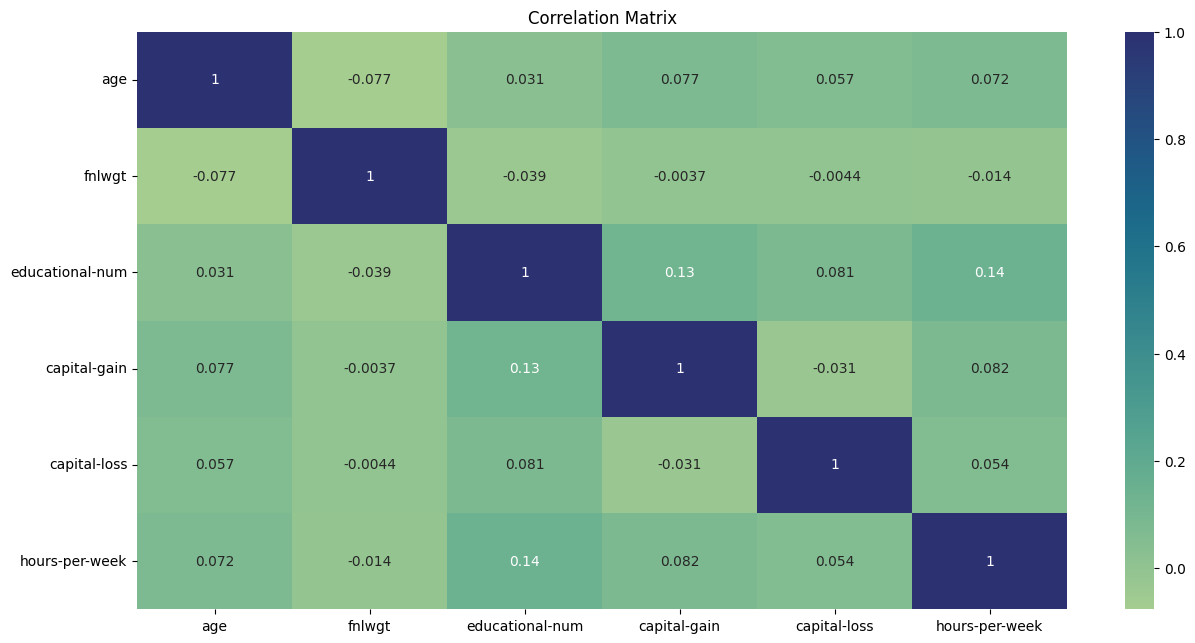

In [39]:
# Correlation matrix using heatmap
correlation_matrix = data.corr(numeric_only=True)
# Create a heatmap figure with specified size (in inches)
plt.figure(figsize=(15, 7.5))

# Generate a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='crest') # annot: write the data value in each cell

# Add a title to the plot
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()

The correlation matrix displays the correlation coefficients between different numeric variables in the dataset, showing how strongly pairs of variables are related to each other. 

**Age :**

- Age has a weak positive correlation with income (0.2304), suggesting that older individuals tend to earn more.

- Age has weak relationships with other variables, such as a small positive correlation with educational number (0.031), capital gain (0.0772), capital   loss (0.0569), and hours per week (0.0716).

**Final Weight (fnlwgt) :**

- fnlwgt exhibits weak negative correlations with most variables, indicating minimal relationships. For example, there's a slight negative correlation    with age (-0.0766), educational number (-0.0388), and income (-0.0063).

**Educational Number :**

- The number of years of education (educational-num) has a notable positive correlation with income (0.3326), implying higher education levels are        linked with higher incomes.

- It also correlates positively with capital gain (0.1251), capital loss (0.0810), and hours per week (0.1437).

**Capital Gain :**

- Capital gain shows a positive correlation with income (0.2230), meaning higher capital gains are associated with higher incomes.

- It also correlates positively with educational number (0.1251), age (0.0772), and hours per week (0.0822).

**Capital Loss :**

- Capital loss has a positive correlation with income (0.1476), indicating individuals with capital losses tend to have higher incomes.

- It also shows weak positive correlations with other variables such as age (0.0569), educational number (0.0810), and hours per week (0.0545).

**Hours per Week :**

- Hours worked per week has a moderate positive correlation with income (0.2277), suggesting that more work hours are associated with higher incomes.

- It also correlates positively with educational number (0.1437) and capital gain (0.0822).

**Income :**

- Income is positively correlated with age (0.2304), educational number (0.3326), capital gain (0.2230), capital loss (0.1476), and hours per week        (0.2277), indicating these factors contribute to higher earnings.

  These correlations help understand the relationships between different variables and how they influence income.

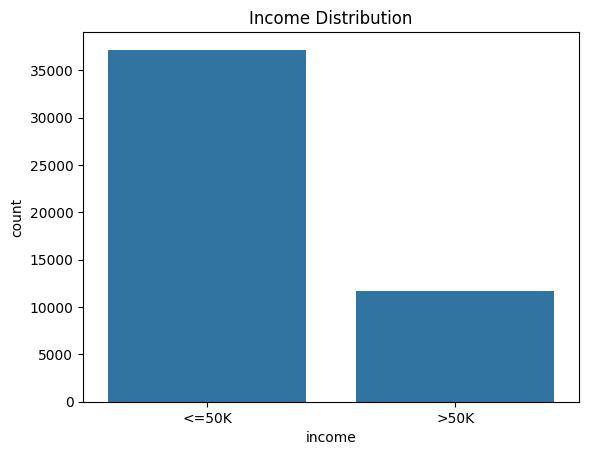

In [40]:
# Distribution of the 'income' column
sns.countplot(x='income', data=data)
plt.title('Income Distribution')
plt.show()

It visualizes the counts of the two income categories in your dataset.

**X-Axis (Income) :** The income levels are represented by two categories:

- 0 : Corresponds to individuals earning <=50K.

- 1 : Corresponds to individuals earning >50K.

**Y-Axis (Count) :** This axis shows the number of individuals in each income category.

    
- There are significantly more individuals in the <=50K category compared to the >50K category.

- The bar for the 0 category has a count slightly above 35,000.

- The bar for the 1 category has a count slightly above 10,000.



## <font color="#800080">  Histogram

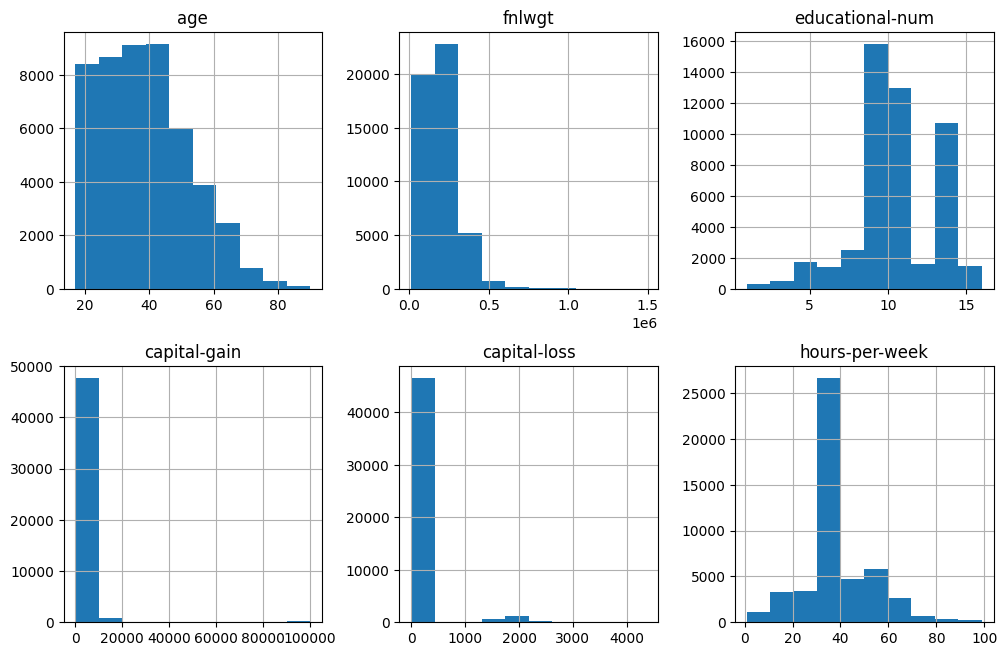

In [41]:
data.hist(figsize=(12,12), layout=(3,3), sharex=False);

##  <font color="#800080">  Box Plot

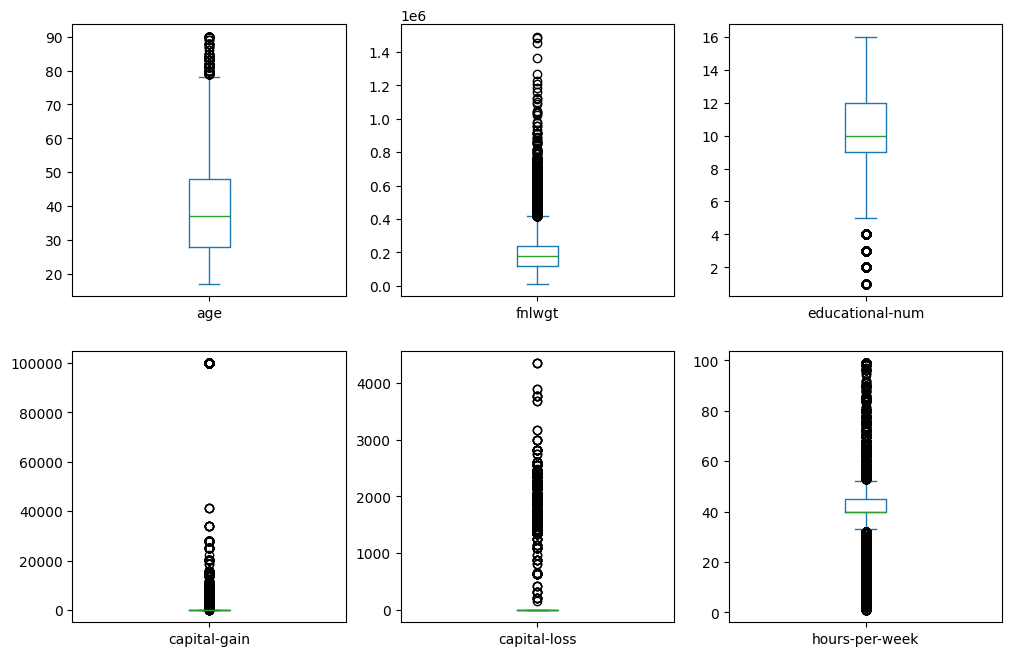

In [42]:
data.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True);

## <font color="#800080">  Pie Chart

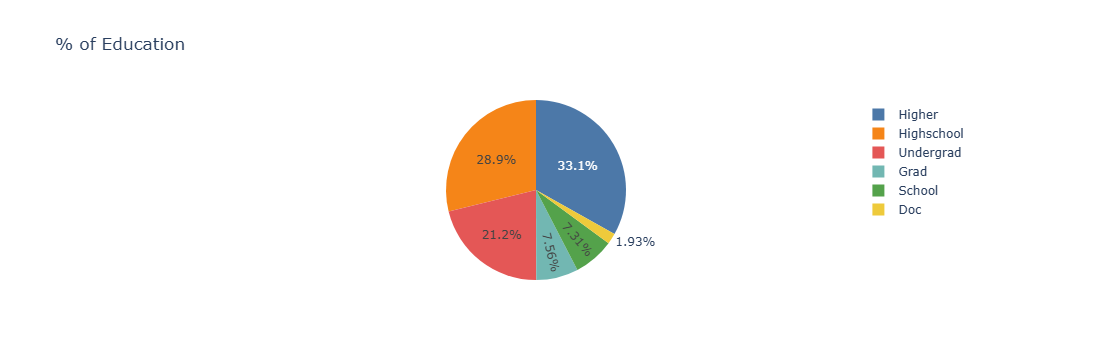

In [43]:
px.pie(data, values='educational-num', names='education', title='% of Education', 
      color_discrete_sequence = px.colors.qualitative.T10)

 The pie chart titled "% of Education" visualizes the distribution of different education levels in your dataset.

- **Higher (represented by blue) :** This segment covers various higher education categories such as Associate degrees, professional school, and some college. It constitutes 35.8% of the total.

- **High school (orange) :** This segment represents individuals who are high school graduates, making up 31.1% of the total.

- **Undergrad (red) :** This segment includes individuals with a bachelor's degree, accounting for 22.9% of the total.

- **Grad (green) :** This segment covers individuals with a master's degree, representing 8.15% of the total.

- **School (light blue) :** This smaller segment includes primary and secondary education levels up to 12th grade, comprising 2.08% of the total.

- **Doc (yellow) :** This segment represents individuals with a doctoral degree.

### <font color="#800080">  Categorical features

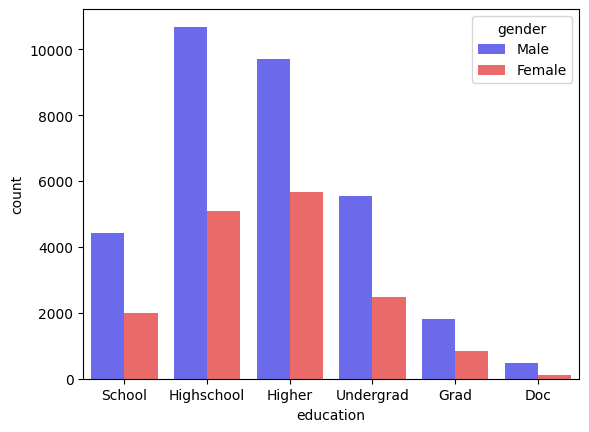

In [44]:
sns.countplot(x='education', hue='gender', data=data, palette='seismic');

** X-Axis (Education) :** Represents the different education levels:

- **school :** Includes primary and secondary education levels up to 12th grade.

- **high school :** Represents individuals who are high school graduates.

- **higher :** Encompasses various higher education categories such as Associate degrees, professional school, and some college.

- **undergrad :** Individuals with a bachelor's degree.

- **grad :** Individuals with a master's degree.

- **doc :** Individuals with a doctoral degree.

**Y-Axis (Count) :** Shows the number of individuals in each education level.

- Hue (Gender) : The bars are color-coded by gender:

- Blue: Represents males.

- Red: Represents females.


*The highest counts for both genders are in the high school and higher education categories.*

*Males generally have higher counts across all education levels compared to females.*

*The undergrad and grad categories also show significant counts, with a noticeable gender difference.*

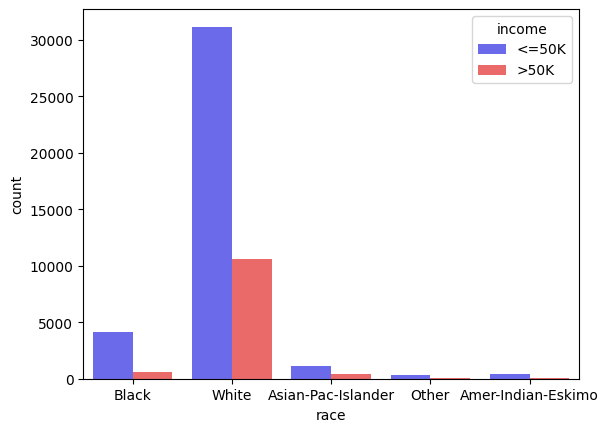

In [45]:
sns.countplot(x='race', hue='income', data=data, palette='seismic');

- **White :** The largest group, with a substantial number of individuals in both income categories, but significantly more in the <=50K category.

- **Black :**  A notable number of individuals, predominantly in the <=50K income category.

- **Asian-Pac-Islander :** Fewer individuals compared to White and Black, with a higher proportion in the >50K category than some other races.

- **Amer-Indian-Eskimo :** Smallest group among the listed races, with more individuals in the <=50K category.

- **Other :** Similar to Asian-Pac-Islander, with a mix of income levels, but with fewer individuals overall.

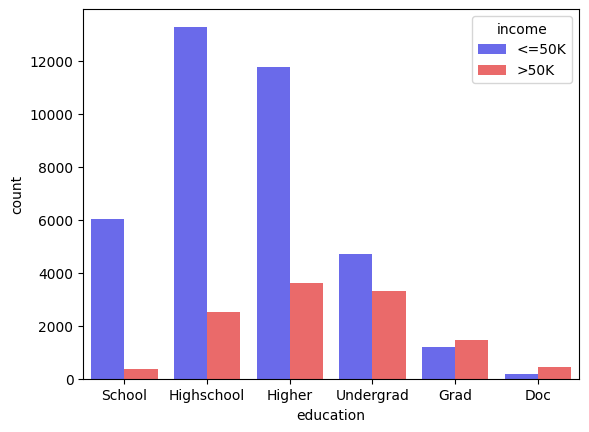

In [46]:
# It shows the distribution of income levels across different education levels in the dataset.
sns.countplot(x='education', hue='income', data=data, palette='seismic');

### <font color="#800080">  Data Relationships Analysis

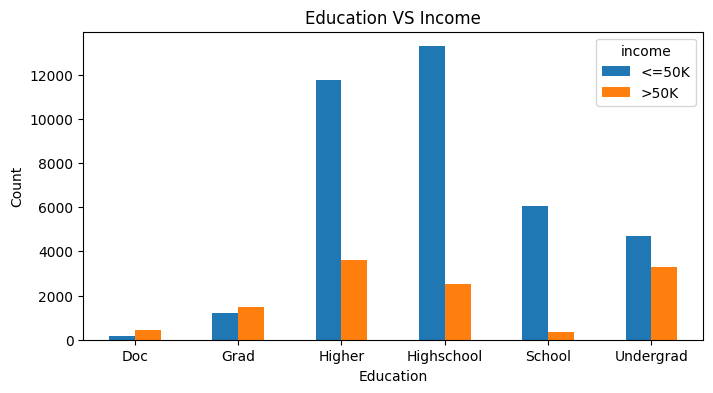

In [47]:
# Create a cross-tabulation of 'Credit History' and 'Loan status' variables
pd.crosstab(data.education, data.income).plot(kind="bar", figsize=(8, 4))

# Add a title to the plot
plt.title('Education VS Income')

# Label the x-axis
plt.xlabel('Education')

# Label the y-axis
plt.ylabel('Count')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=0)

# Display the plot
plt.show()

**X-Axis (Education) :** Represents the different education levels in the dataset:

- **doc :** Individuals with a doctoral degree.

- **grad :** Individuals with a master's degree.

- **high school :** High school graduates.

- **higher :** Includes Associate degrees, professional school, and some college.

- **school :** Primary and secondary education up to 12th grade.

- **undergrad :** Individuals with a bachelor's degree.

**Y-Axis (Count) :** Indicates the number of individuals in each education level.

- Hue (Income): The bars are color-coded by income levels:

- 0 (blue): Represents individuals earning <=50K.

- 1 (orange): Represents individuals earning >50K.


*High School and Higher Education : These categories have the highest counts, showing a significant number of individuals in both income levels.*

*Undergrad and Grad : These categories have a notable proportion of individuals earning >50K, highlighting the impact of higher education on income.*

- Doc: Although smaller in number, this group has a considerable portion earning >50K.

- School: Most individuals in this category earn <=50K, reflecting the lower income potential without higher education.

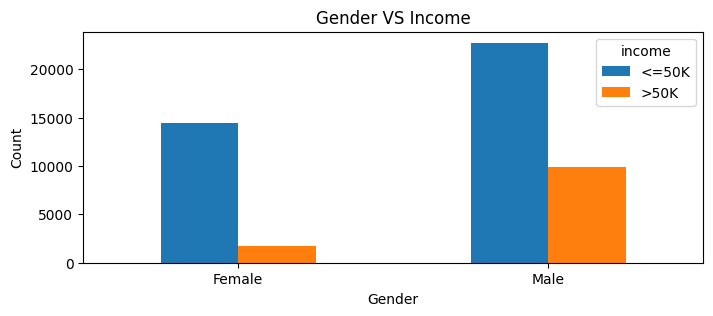

In [48]:
# Create a cross-tabulation of 'Gender' and 'Income' variables
pd.crosstab(data.gender, data.income).plot(kind="bar", figsize=(8, 3))

# Add a title to the plot
plt.title('Gender VS Income')

# Label the x-axis
plt.xlabel('Gender')

# Label the y-axis
plt.ylabel('Count')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=0)

# Display the plot
plt.show()

- **Male :** The chart shows that there are more males in both income categories compared to females.

- The count of males earning <=50K is higher than those earning >50K.

Similarly, the count of males earning >50K is higher than females in the same income category.

- **Female :** The chart also indicates that there are fewer females in both income categories compared to males.

The majority of females fall into the <=50K income category.

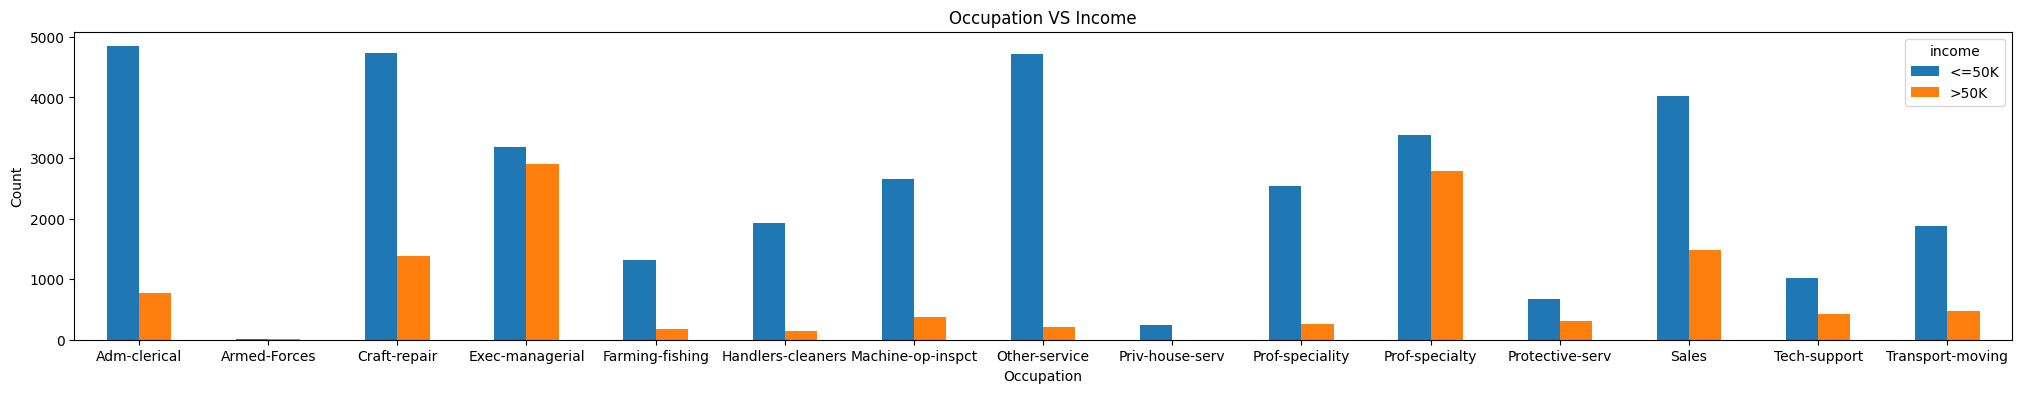

In [49]:
# Create a cross-tabulation of 'Credit History' and 'Loan status' variables
pd.crosstab(data.occupation, data.income).plot(kind="bar", figsize=(25, 4))

# Add a title to the plot
plt.title('Occupation VS Income')

# Label the x-axis
plt.xlabel('Occupation')

# Label the y-axis
plt.ylabel('Count')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=0)

# Display the plot
plt.show()

- **Prof-specialty and Exec-managerial :** These occupations have a relatively higher count of individuals earning >50K compared to other occupations, indicating that these fields are associated with higher incomes.

- **Adm-clerical, Craft-repair, Sales, and Other-service :** These occupations have a significant number of individuals earning <=50K.

- **Armed-Forces, Farming-fishing, Handlers-cleaners, Priv-house-serv :** These categories have the smallest counts, with most individuals earning <=50K.

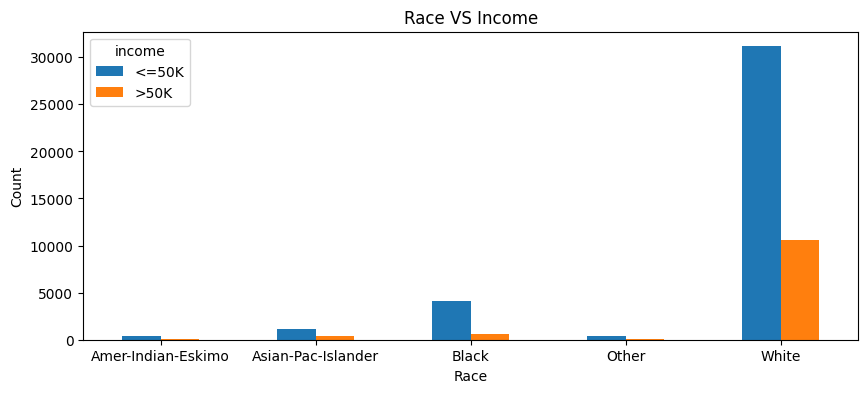

In [50]:
# Create a cross-tabulation of 'Credit History' and 'Loan status' variables
pd.crosstab(data.race, data.income).plot(kind="bar", figsize=(10, 4))

# Add a title to the plot
plt.title('Race VS Income')

# Label the x-axis
plt.xlabel('Race')

# Label the y-axis
plt.ylabel('Count')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=0)

# Display the plot
plt.show()

- **White :** The largest racial group, with a substantial number of individuals in both income levels. The majority earn <=50K, but a significant number also earn >50K.

- **Black :** The second-largest group, predominantly earning <=50K, with fewer individuals earning >50K.

- **Asian-Pac-Islander :** This group shows a more balanced distribution, though still with more individuals in the <=50K range.

- **Amer-Indian-Eskimo and Other :** These categories have smaller counts, with the majority of individuals earning <=50K.

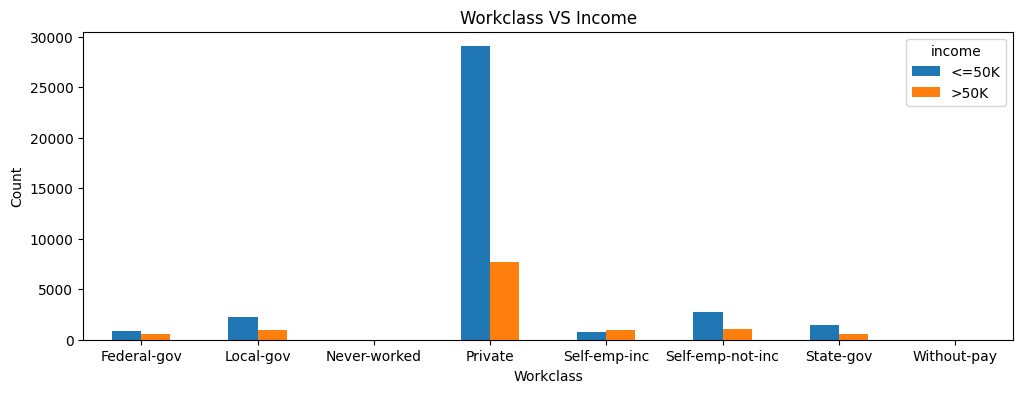

In [51]:
# Create a cross-tabulation of 'Credit History' and 'Loan status' variables
pd.crosstab(data.workclass, data.income).plot(kind="bar", figsize=(12, 4))

# Add a title to the plot
plt.title('Workclass VS Income')

# Label the x-axis
plt.xlabel('Workclass')

# Label the y-axis
plt.ylabel('Count')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=0)

# Display the plot
plt.show()

- **Private Workclass :** The largest number of individuals fall into this category. Most of them earn <=50K, but there is also a noticeable portion earning >50K.

- **Self-Employed (Not Incorporated) :** This group also has a significant number of individuals, predominantly earning <=50K.

- **Federal and State Government :** These categories show a more balanced distribution between the two income levels.

- **Other Workclasses :** Such as Local-gov, Self-emp-inc, Without-pay, Never-worked, and Armed-Forces have fewer individuals, with varying distributions of income.


## <font color="#800080" size=""> Identifying Outliers </font>

In [53]:
# numerical columns

numeric = data.select_dtypes(include=np.number).columns
print(numeric)

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


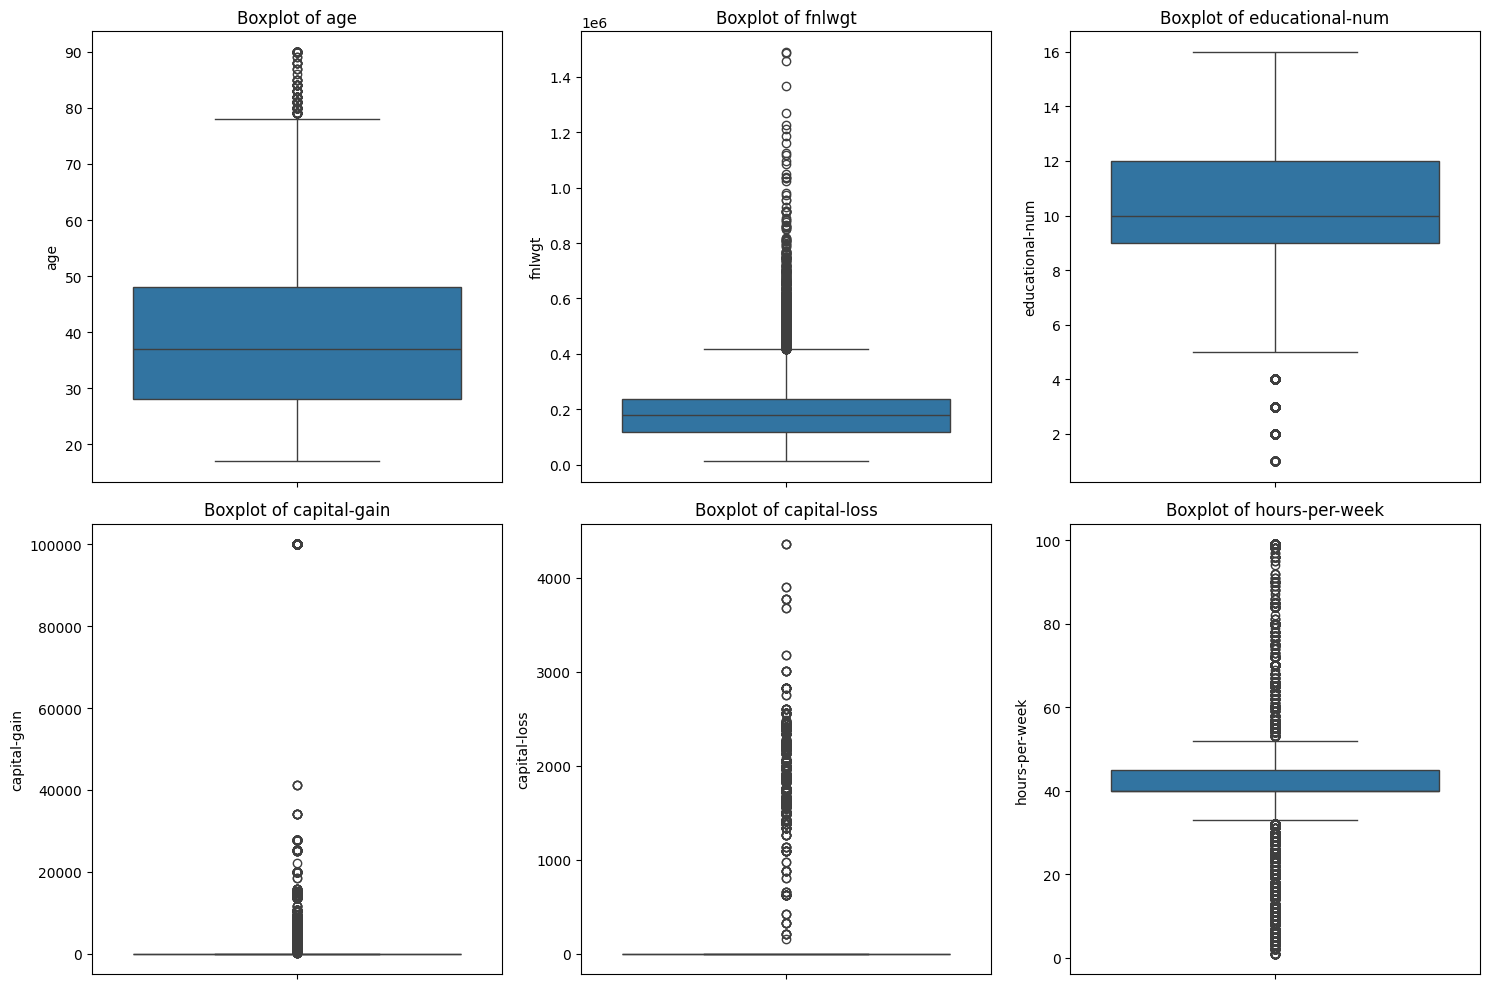

In [55]:
# List of numeric columns to check for outliers

numeric_cols =  ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week' ]

# Plot boxplots for numeric columns

plt.figure(figsize=(15,10))
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


**Boxplot of age :**

- The age data ranges from approximately 20 to 90 years.

- The median age is around 37 years.

- There are several outliers above the age of 80.

**Boxplot of fnlwgt :**

- The fnlwgt (final weight) data ranges from 0 to approximately 1.5 million.

- The median fnlwgt is around 200,000.

- There are numerous outliers above 400,000.

**Boxplot of educational-num :**

- The educational-num data ranges from 1 to 16.

- The median educational-num is around 10.

- There are a few outliers below 4.

 **Boxplot of capital-gain :**

- The capital-gain data ranges from 0 to approximately 100,000.

- The median capital-gain is 0, indicating that most individuals have no capital gain.

There are several outliers above 20,000.

**Boxplot of capital-loss :**

- The capital-loss data ranges from 0 to approximately 4,000.

- The median capital-loss is 0, indicating that most individuals have no capital loss.

- There are several outliers above 1,000.

**Boxplot of hours-per-week :**

- The hours-per-week data ranges from 0 to 100.

- The median hours-per-week is around 40.

- There are several outliers below 20 and above 60.

In [57]:
#Select numerical columns

numeric_cols = data.select_dtypes(include=np.number).columns


#Function to detect outliers using IQR

def detect_outliers_iqr(data, column):
    q1, q3 = data[column].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers= data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

#Detect outliers for each numerical column 
for col in numeric_cols:
    outliers =  detect_outliers_iqr(data, col)
    print(f"Outliers for {col}:\n{outliers}")

Outliers for age:
       age         workclass  fnlwgt   education  educational-num  \
193     79           Private   48574      School                4   
234     80  Self-emp-not-inc  201092  Highschool                9   
899     90           Private  149069      Higher               12   
926     79           Private   27457        Grad               14   
951     80           Private  138050  Highschool                9   
...    ...               ...     ...         ...              ...   
48558   90           Private  313749  Highschool                9   
48648   90         Local-gov  214594      School                4   
48740   85           Private   98611   Undergrad               13   
48775   82           Private  403910  Highschool                9   
48806   81           Private  120478      Higher               11   

      marital-status         occupation   relationship   race  gender  \
193          Widowed    Prof-speciality  Not-in-family  White    Male   
234    

## <font color="#800080" size="">  Encoding Categorical Features </font>

In [59]:
# Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder

# List of ordinal categorical columns
ordinal_columns = ['education']

# Apply Label Encoding

label_encoder = LabelEncoder()
for column in ordinal_columns:
    outliers[column] = label_encoder.fit_transform(outliers[column])

# Apply One-Hot Encoding to nominal categorical columns

nominal_columns= ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
new_data = pd.get_dummies(data, columns=nominal_columns, drop_first=True)